In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import pygplates
import os
from IPython.display import Image
from resolve_topologies import resolve_topologies as topology2gmt
%matplotlib inline

../Data/5_Reconstructed_Paleogeog_GolonkaIDs_126Ma/sm_fig46_135_117_reconstructed_126.00Ma.shp
No icesheet found


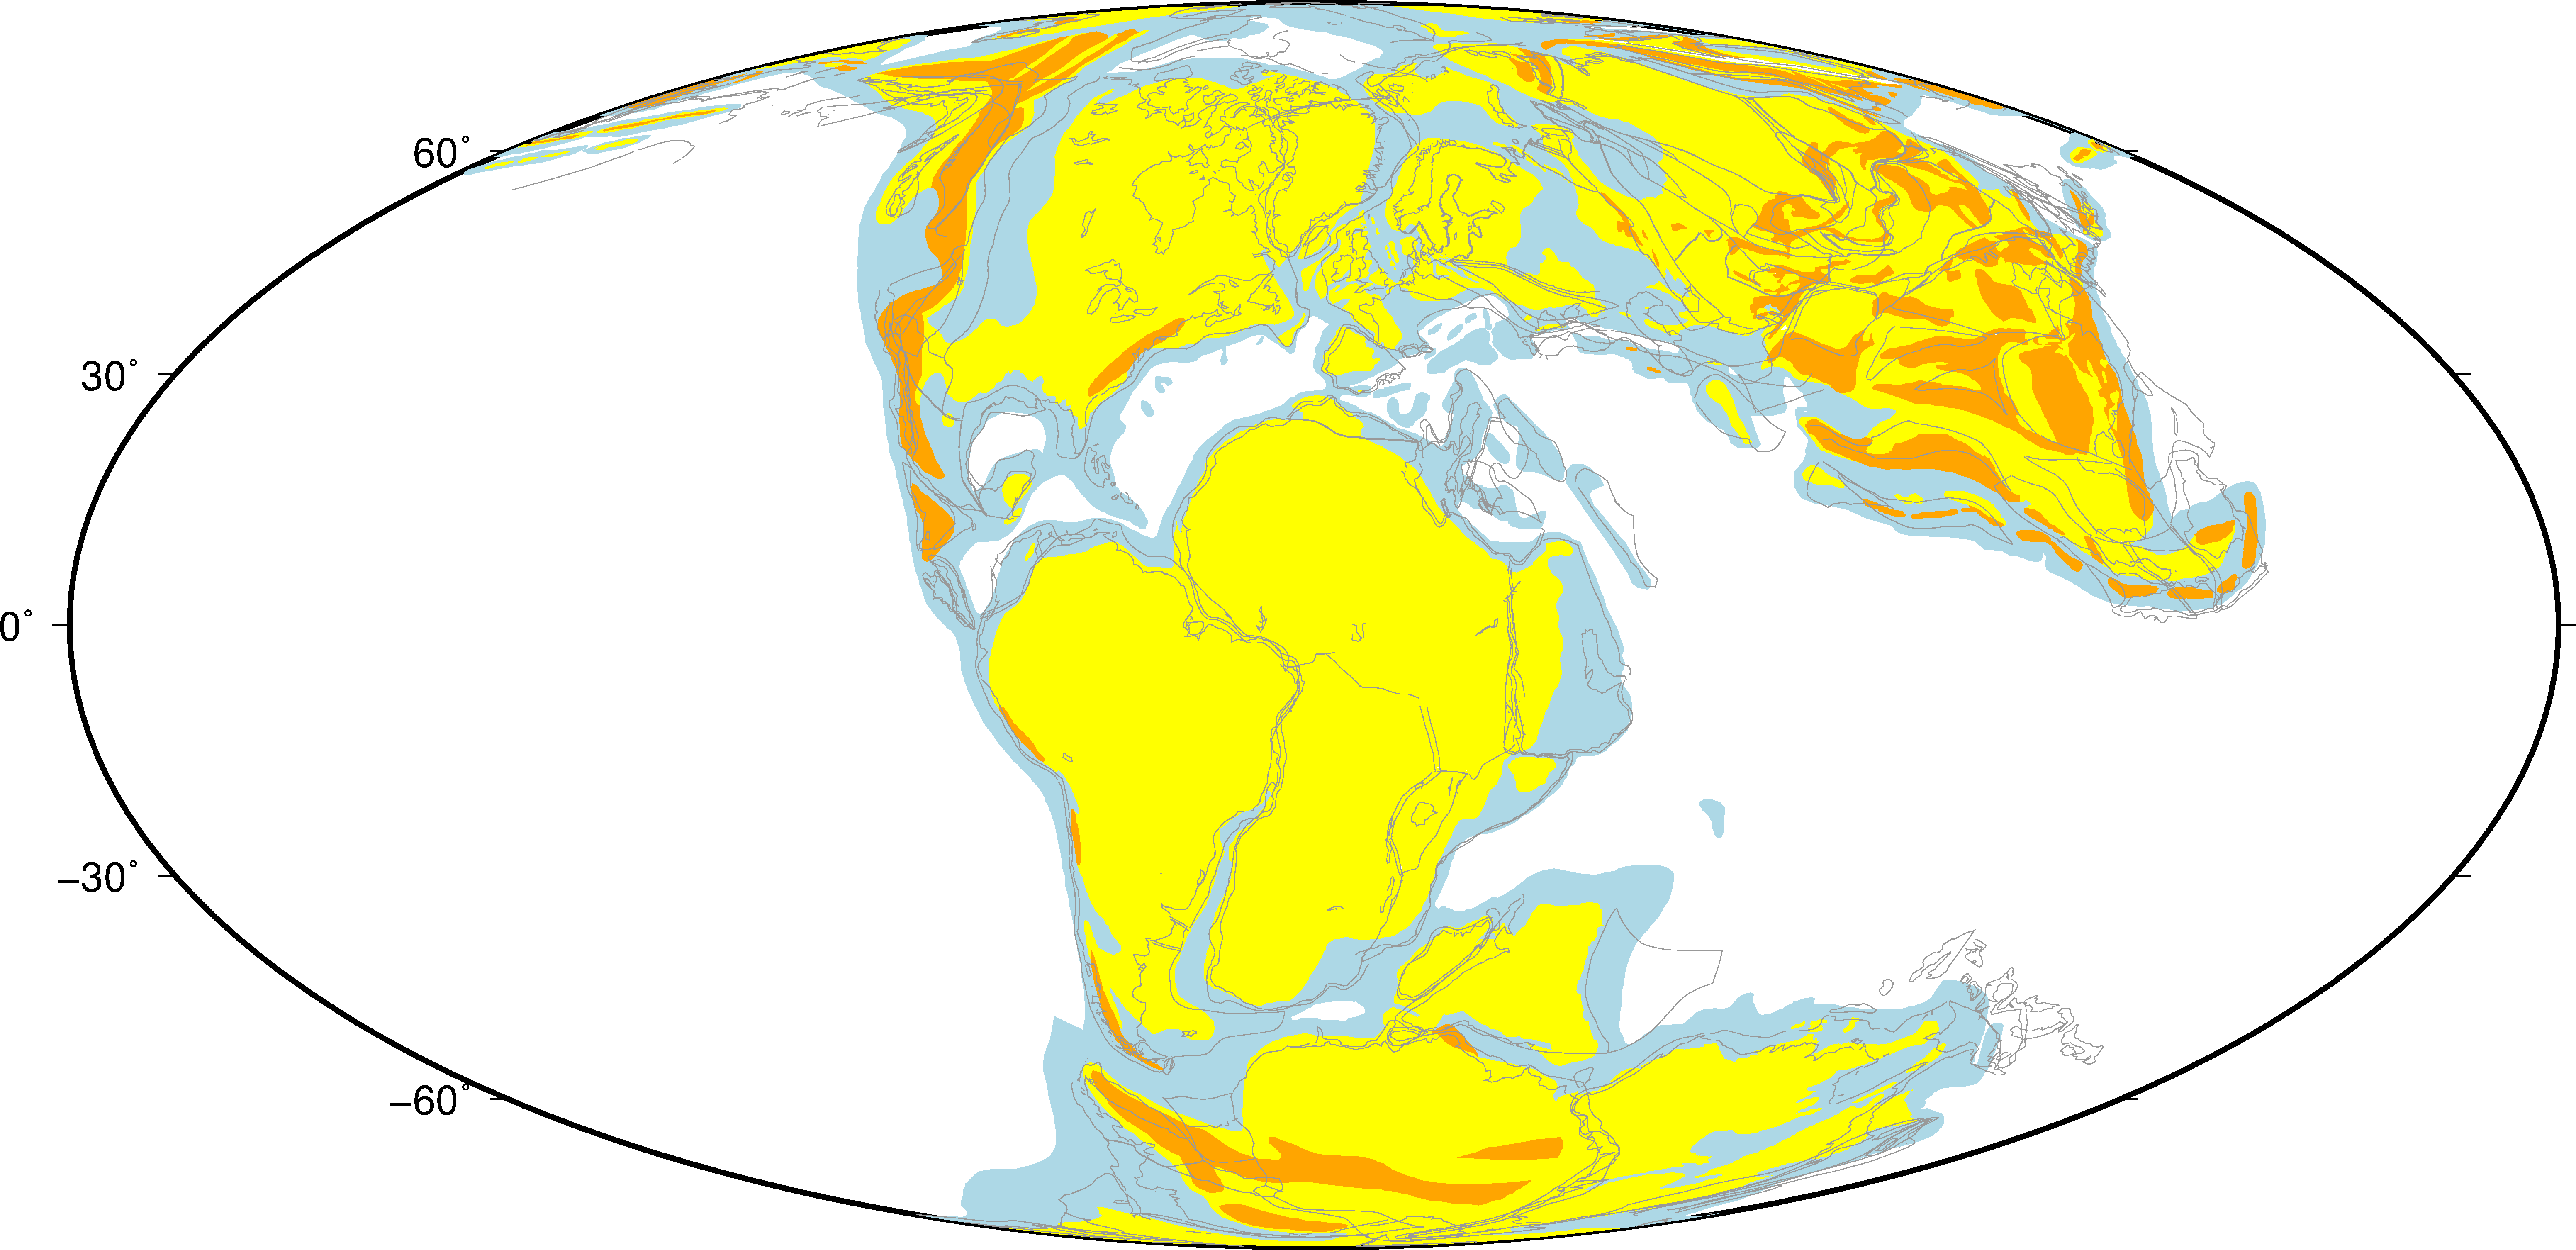

In [16]:
#Input parameters to define how reconstruction is made
reconstruction_time = 126
FromAge = 135
ToAge = 117
FigNum = 46
anchor_plate = 0

#Generate Golonka's reconstructed coastlines
input_rotation_filename = '../Data/126/Golonka_master94c1_Africa-Rel_Revised_130.5Ma.rot'
input_feature_filename = '../Data/Orignial_RotaCoastConti_Golonka/Golonka_CS.shp'
output_reconstructed_feature_filename = 'Golonka_reconstructed_coastlines_%0.2fMa.shp' % reconstruction_time

# Use pygplates to carry out the reconstruction 
pygplates.reconstruct(input_feature_filename, input_rotation_filename, output_reconstructed_feature_filename, reconstruction_time, anchor_plate) 

######
outfile='Paleogeog_Reconstruction_GolonkaIDs_'+str(reconstruction_time)+'Ma.ps'

basedir = '../Data/5_Reconstructed_Paleogeog_GolonkaIDs_'+str(reconstruction_time)+'Ma'

subduction = '%s/subduction_fig%d_%d_%d.shp' % (basedir,FigNum,FromAge,ToAge)
icesheet =  '%s/i_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)
mountain =  '%s/m_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)
landmass = '%s/lm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)
shallow_marine = '%s/sm_fig%d_%d_%d_reconstructed_%0.2fMa.shp' % (basedir,FigNum,FromAge,ToAge,reconstruction_time)

print shallow_marine

# Select a projection - central meridian is set to 30 deg longitude for each
#proj='-Ji30/0.02i'  # uncomment for Sinusoidal projection
#proj='-JN30/5i'      # uncomment for Robinson projection
proj='-JW0/10i'    # uncomment for Mollweide projection

os.system('gmt psbasemap -Rg %s -Ba30f30We -K > %s ' % (proj,outfile))

#rename files (shapefile -> shapefile; shapefile ->.gmt)
tmp = pygplates.FeatureCollection(shallow_marine)
tmp.write('sm.gmt')
tmp = pygplates.FeatureCollection(landmass)
tmp.write('lm.gmt')
tmp = pygplates.FeatureCollection(mountain)
tmp.write('m.gmt')
tmp = pygplates.FeatureCollection(subduction)
tmp.write('subduction.gmt')
tmp = pygplates.FeatureCollection(output_reconstructed_feature_filename)
tmp.write('coastlines.gmt')

if os.path.isfile(icesheet):
    tmp = pygplates.FeatureCollection(icesheet)
    tmp.write('i.gmt')
else:
        print 'No icesheet found'  

#plot all
os.system('gmt psxy -Rg %s -W0.1p,lightblue -Glightblue sm.gmt -K -O -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.1p,yellow -Gyellow lm.gmt -K -O -N >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.1p,orange -Gorange m.gmt -K -O -N >> %s' % (proj,outfile))
#os.system('gmt psxy -Rg %s -W0.1p,223/223/255 -G223/223/255 i.gmt -K -O -N >> %s' % (proj,outfile))
#os.system('gmt psxy -Rg %s -W0.8p,black -K -O -m subduction.gmt -V >> %s' % (proj,outfile))
os.system('gmt psxy -Rg %s -W0.2p,grey60 -O -m coastlines.gmt -V >> %s' % (proj,outfile))

os.system('gmt ps2raster %s -A -E600 -Tg -P' % outfile)  #-F${reconstruction_time}Ma
os.system('gmt ps2raster %s -A -E600 -Tf -P' % outfile)  #-F${reconstruction_time}Ma


os.system('mv *.pdf *.png ../Code/Output/')
os.system('rm *.xml *.gmt *.xml *.shx *.shp *.history *.ps *.pyc *.shx *.prj *.dbf')

Image('../Code/Output/Paleogeog_Reconstruction_GolonkaIDs_'+str(reconstruction_time)+'Ma.png')
